In [1]:
#Import stuff
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import pystokes
import pyforces

## Stokeslet flow

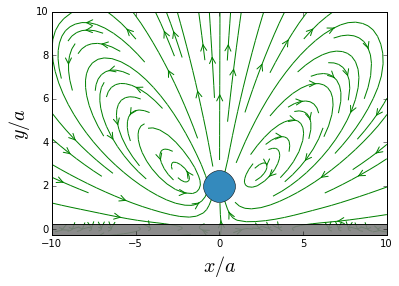

In [2]:
#Stokeslet flow in plane perpendicular to the no-slip surface

%matplotlib inline
#Paramter declaration and memory allocations
a, eta, dim = 1, 1.0/6, 3
L, Ng = 10, 32

Np, Nt = 1, Ng*Ng
r = np.zeros(3*Np)
F = np.zeros(3*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[Nt:3*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))

h =2
r[0], r[1], r[2]= 0, 0, h
F[0], F[1], F[2]= 0, 0, 1

####Instantiate the Flow class
wFlow = pystokes.wallBounded.Flow(a, eta, Np, Nt)

vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities
wFlow.stokesletV(vv, rt, r, F)
vx, vy, vz = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng), vv[2*Nt:3*Nt].reshape(Ng, Ng)


##Plotting
plt.figure()
plt.plot(r[0], r[2], marker='o', markerfacecolor='#348ABD', markersize=32 )   # plot the particle at r
plt.streamplot(X, Y, vy, vz, density=1.2, arrowstyle='->', arrowsize =1.5)
ww=0.25; plt.xlim([-L, L])
plt.ylim([-ww, L])
plt.xlabel(r'$x/a$', fontsize=20)
plt.ylabel(r'$y/a$', fontsize=20)
plt.axhspan(-ww, ww, facecolor='0.5', alpha=0.9);

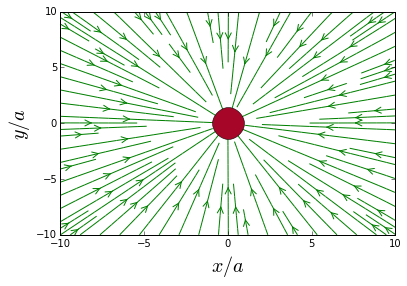

In [4]:
%matplotlib inline
#Paramter declaration and memory allocations
a, eta, dim = 1, 1.0/6, 3
L, Ng = 10, 32

Np, Nt = 1, Ng*Ng
r = np.zeros(3*Np)
F = np.zeros(3*Np)
rt = np.zeros(dim*Nt)                   # Memory Allocation for field points

xx = np.linspace(-L, L, Ng)
yy = np.linspace(-L, L, Ng)
X, Y = np.meshgrid(xx, yy)
rt[0:2*Nt] = np.concatenate((X.reshape(Ng*Ng), Y.reshape(Ng*Ng)))

h =2.5
rt[2*Nt:3*Nt]=h
r[0], r[1], r[2]= 0, 0, h
F[0], F[1], F[2]= 0, 0, 1

####Instantiate the Flow class
wFlow = pystokes.wallBounded.Flow(a, eta, Np, Nt)
vv = np.zeros(dim*Nt)                   # Memory Allocation for field Velocities
wFlow.stokesletV(vv, rt, r, F)
vx, vy = vv[0:Nt].reshape(Ng, Ng), vv[Nt:2*Nt].reshape(Ng, Ng)


##Plotting
plt.figure()
plt.plot(r[0], r[1], marker='o', markerfacecolor="#A60628", markersize=32 )   # plot the particle at r

plt.streamplot(X, Y, vx, vy, density=1.2, arrowstyle='->', arrowsize =1.5)

plt.xlim([-L, L]);   plt.ylim([-L, L])
plt.xlabel(r'$x/a$', fontsize=20); plt.ylabel(r'$y/a$', fontsize=20);
